<a href="https://colab.research.google.com/github/Python-Is-Long/Teaching/blob/main/Basic_pandas_analysis_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-10-30

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from IPython.display import display

# Load data

In [ ]:
%%time
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1mhsvYjkdo2LFF1KXGYI5vZDZgejoD4yh",
                                    dest_path="./HR Dataset.csv",
                                    unzip=False)
df = pd.read_csv("HR Dataset.csv")
df_original = df.copy() #create a backup of the original dataframe (just in case we mess up...)

CPU times: user 99.3 ms, sys: 21 ms, total: 120 ms
Wall time: 4.66 s


# Inspect data

In [ ]:
print(df.shape) #check the shape of the dataframe
# df.head()
df

(4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
print(df.columns.tolist()) #check the exact column names (because sometimes there are weird characters like "\n" in the column name)

['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
df.dtypes #check value types

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [ ]:
df.nunique() #count unique values in each column

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [ ]:
df["Department"].unique() #examine the unique values in a column

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
df["Department"].value_counts() #examine the count of each unique values in a column (useful for identifying rare categories)

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [ ]:
df.info() #show basic info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# df.columns[df.isnull().any()] #show columns that contain missing values
df.isnull().sum() # count missing values in each column

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# How do we handle missing values?

## Simply drop the missing values

In [ ]:
df.dropna(axis=0, subset=["TotalWorkingYears"], inplace=True) #drop the rows that contain missing TotalWorkingYears values
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2


## Simple imputation

In [ ]:
# df["NumCompaniesWorked"].isna().sum() #NOTE: NaN is only one type of missing values; there are actually more types of missing values in pandas, so isnull() is more comprehensive than isna()
df["NumCompaniesWorked"].isnull().sum()

19

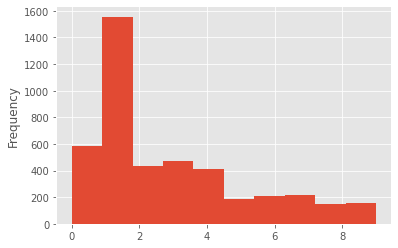

In [ ]:
df["NumCompaniesWorked"].plot(kind="hist"); #plot of histogram to see how the values in the column are distributed
# df["NumCompaniesWorked"].value_counts() #get a rough idea about the distribution of the values in this column

In [ ]:
df["NumCompaniesWorked"].describe() #see summary stats of this column

count    4382.000000
mean        2.693291
std         2.497832
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [ ]:
df["NumCompaniesWorked"].median() #see the median value of this column

2.0

In [ ]:
df["NumCompaniesWorked"].fillna(df["NumCompaniesWorked"].median(), inplace=True) #fill the missing values in the column

In [ ]:
df.info() #see if the missing values are filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4401 non-null   int64  
 1   Attrition                4401 non-null   object 
 2   BusinessTravel           4401 non-null   object 
 3   Department               4401 non-null   object 
 4   DistanceFromHome         4401 non-null   int64  
 5   Education                4401 non-null   int64  
 6   EducationField           4401 non-null   object 
 7   EmployeeCount            4401 non-null   int64  
 8   EmployeeID               4401 non-null   int64  
 9   Gender                   4401 non-null   object 
 10  JobLevel                 4401 non-null   int64  
 11  JobRole                  4401 non-null   object 
 12  MaritalStatus            4401 non-null   object 
 13  MonthlyIncome            4401 non-null   int64  
 14  NumCompaniesWorked      

## More sophisticated imputation (by groups)

In [ ]:
df["JobLevel"].value_counts()

1    1624
2    1599
3     653
4     318
5     207
Name: JobLevel, dtype: int64

In [ ]:
df.groupby("JobLevel")["NumCompaniesWorked"].transform("mean")

0       2.665640
1       2.665640
2       2.443396
3       2.765697
4       2.665640
          ...   
4404    2.744841
4405    2.665640
4406    2.665640
4407    2.744841
4408    2.665640
Name: NumCompaniesWorked, Length: 4401, dtype: float64

In [ ]:
df["NumCompaniesWorked"].fillna(df.groupby("JobLevel")["NumCompaniesWorked"].transform("mean"), inplace=True) #this will impute the missing values by each subcategories' mean

# Descriptive analysis examples

In [ ]:
df.describe() #lazy way to show the basic stats for numerical columns (CAUTION: some columns might yield meaningful result, such as EmployeeID)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4401.000000,4401.000000,4401.000000,4401.0,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.0,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000
mean,36.920473,9.190184,2.912293,1.0,2206.310611,2.064985,65029.057032,2.690298,15.207453,8.0,0.794138,11.279936,2.798228,7.003636,2.188366,4.122927
std,9.139377,8.102578,1.024489,0.0,1272.353255,1.107148,47076.746976,2.492848,3.659222,0.0,0.852202,7.782222,1.288483,6.123315,3.221407,3.568056
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1105.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2206.000000,2.000000,49080.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## How to study the top or bottom values

In [ ]:
df.sort_values("JobLevel", ascending=True) #we are not using inplace=True here, so it's not doing any change to the input dataframe

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
2248,31,Yes,Travel_Frequently,Research & Development,7,4,Life Sciences,1,2249,Male,1,Laboratory Technician,Married,65000,6.0,Y,23,8,1,7.0,5,2,2,2
2249,45,No,Travel_Rarely,Research & Development,1,2,Life Sciences,1,2250,Female,1,Research Scientist,Married,184300,4.0,Y,12,8,1,10.0,5,3,1,2
2252,40,No,Non-Travel,Research & Development,25,4,Other,1,2253,Female,1,Sales Executive,Divorced,31490,2.0,Y,15,8,1,16.0,1,9,4,8
2253,28,No,Travel_Rarely,Research & Development,1,2,Technical Degree,1,2254,Female,1,Research Scientist,Single,176390,0.0,Y,13,8,1,6.0,0,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,31,No,Travel_Rarely,Research & Development,8,5,Life Sciences,1,3957,Male,5,Sales Executive,Married,131200,1.0,Y,12,8,2,13.0,6,12,5,7
3953,21,Yes,Travel_Rarely,Sales,1,2,Marketing,1,3954,Male,5,Healthcare Representative,Single,27910,1.0,Y,14,8,0,1.0,3,1,1,0
3952,34,No,Travel_Rarely,Sales,10,2,Life Sciences,1,3953,Female,5,Sales Executive,Single,77790,5.0,Y,12,8,1,6.0,2,2,2,2
3997,36,No,Travel_Rarely,Sales,2,3,Technical Degree,1,3998,Female,5,Laboratory Technician,Married,22900,4.0,Y,11,8,0,15.0,5,1,0,0


In [ ]:
df.sort_values("MonthlyIncome", ascending=False)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3325,42,No,Travel_Rarely,Research & Development,18,1,Technical Degree,1,3326,Female,2,Research Scientist,Married,199990,2.0,Y,23,8,1,17.0,6,5,1,3
1855,42,No,Travel_Rarely,Research & Development,18,1,Technical Degree,1,1856,Female,2,Research Scientist,Married,199990,2.0,Y,23,8,1,17.0,6,5,1,3
385,42,No,Travel_Rarely,Research & Development,18,1,Technical Degree,1,386,Female,2,Research Scientist,Married,199990,2.0,Y,23,8,1,17.0,6,5,1,3
2411,36,No,Travel_Rarely,Research & Development,2,2,Technical Degree,1,2412,Male,3,Sales Executive,Married,199730,6.0,Y,12,8,0,10.0,2,3,0,2
3881,36,No,Travel_Rarely,Research & Development,2,2,Technical Degree,1,3882,Male,3,Sales Executive,Married,199730,6.0,Y,12,8,0,10.0,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,36,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,2393,Female,2,Healthcare Representative,Single,10510,2.0,Y,14,8,0,15.0,2,4,1,3
922,36,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,923,Female,2,Healthcare Representative,Single,10510,2.0,Y,14,8,0,15.0,2,4,1,3
2178,58,Yes,Travel_Rarely,Sales,1,4,Technical Degree,1,2179,Male,2,Sales Executive,Married,10090,7.0,Y,13,8,2,31.0,3,10,5,9
3648,58,Yes,Travel_Rarely,Sales,1,4,Technical Degree,1,3649,Male,2,Sales Executive,Married,10090,7.0,Y,13,8,2,31.0,3,10,5,9


In [ ]:
df_sorted = df.sort_values(by=["JobLevel", "MonthlyIncome"], ascending=[True, False]) #apply multi-level sorting and store the output as a new dataframe
df_sorted

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
360,25,No,Travel_Rarely,Research & Development,17,3,Medical,1,361,Male,1,Laboratory Technician,Single,199260,7.0,Y,11,8,3,6.0,5,4,0,1
1830,25,No,Travel_Rarely,Research & Development,17,3,Medical,1,1831,Male,1,Laboratory Technician,Single,199260,7.0,Y,11,8,3,6.0,5,4,0,1
3300,25,No,Travel_Rarely,Research & Development,17,3,Medical,1,3301,Male,1,Laboratory Technician,Single,199260,7.0,Y,11,8,3,6.0,5,4,0,1
944,38,No,Travel_Rarely,Research & Development,11,2,Life Sciences,1,945,Male,1,Sales Executive,Married,198450,7.0,Y,11,8,1,7.0,3,0,0,0
2414,38,No,Travel_Rarely,Research & Development,11,2,Life Sciences,1,2415,Male,1,Sales Executive,Married,198450,7.0,Y,11,8,1,7.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,33,No,Travel_Rarely,Sales,1,3,Life Sciences,1,2576,Female,5,Sales Executive,Single,12230,1.0,Y,13,8,1,10.0,3,10,0,9
4045,33,No,Travel_Rarely,Sales,1,3,Life Sciences,1,4046,Female,5,Sales Executive,Single,12230,1.0,Y,13,8,1,10.0,3,10,0,9
496,33,No,Non-Travel,Sales,9,2,Technical Degree,1,497,Male,5,Sales Representative,Single,12000,0.0,Y,11,8,1,3.0,3,2,2,2
1966,33,No,Non-Travel,Sales,9,2,Technical Degree,1,1967,Male,5,Sales Representative,Single,12000,0.0,Y,11,8,1,3.0,3,2,2,2


In [ ]:
df_sorted.loc[360] #let's check this guy
# df_sorted.iloc[[0]]
# df_sorted[df_sorted["EmployeeID"]==361]

Age                                            25
Attrition                                      No
BusinessTravel                      Travel_Rarely
Department                 Research & Development
DistanceFromHome                               17
Education                                       3
EducationField                            Medical
EmployeeCount                                   1
EmployeeID                                    361
Gender                                       Male
JobLevel                                        1
JobRole                     Laboratory Technician
MaritalStatus                              Single
MonthlyIncome                              199260
NumCompaniesWorked                              7
Over18                                          Y
PercentSalaryHike                              11
StandardHours                                   8
StockOptionLevel                                3
TotalWorkingYears                               6


In [ ]:
df_sorted.iloc[:10][["JobRole", "MaritalStatus", "NumCompaniesWorked"]] #check the top few guys' specific info
# df_sorted.head(10)[["JobRole", "MaritalStatus", "NumCompaniesWorked"]]
# df_sorted[["JobRole", "MaritalStatus", "NumCompaniesWorked"]].head(10)

,JobRole,MaritalStatus,NumCompaniesWorked
360,Laboratory Technician,Single,7.0
1830,Laboratory Technician,Single,7.0
3300,Laboratory Technician,Single,7.0
944,Sales Executive,Married,7.0
2414,Sales Executive,Married,7.0
3884,Sales Executive,Married,7.0
56,Sales Executive,Married,1.0
1526,Sales Executive,Married,1.0
2996,Sales Executive,Married,1.0
1349,Research Scientist,Married,4.0


## How to narrow down the data to look at

In [ ]:
df["EducationField"].value_counts()

Life Sciences       1812
Medical             1389
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [ ]:
df_medical=df[df["EducationField"]=="Medical"] #find personnel with medical education background
df_medical

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,Sales Executive,Single,58130,2.0,Y,20,8,1,5.0,2,0,0,0
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,1,11,Male,2,Laboratory Technician,Married,79910,0.0,Y,13,8,2,21.0,2,20,4,10
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,Research Scientist,Married,57620,1.0,Y,11,8,2,10.0,4,10,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,37,No,Travel_Rarely,Research & Development,22,5,Medical,1,4401,Female,2,Manufacturing Director,Married,30550,2.0,Y,14,8,3,17.0,3,3,0,2
4403,39,No,Travel_Frequently,Research & Development,22,3,Medical,1,4404,Female,1,Manufacturing Director,Single,129650,0.0,Y,19,8,1,20.0,2,19,11,8
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2


In [ ]:
df_medical[df_medical["JobRole"].isin(["Laboratory Technician", "Research Scientist"])] #find personnel with medical background that are working on research or in the lab

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,4,Laboratory Technician,Divorced,134640,1.0,Y,13,8,1,6.0,2,6,1,5
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,1,11,Male,2,Laboratory Technician,Married,79910,0.0,Y,13,8,2,21.0,2,20,4,10
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,Research Scientist,Married,57620,1.0,Y,11,8,2,10.0,4,10,9,9
24,29,No,Travel_Frequently,Research & Development,16,4,Medical,1,25,Male,1,Laboratory Technician,Single,65130,1.0,Y,11,8,1,10.0,2,10,0,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,2,Research Scientist,Divorced,103330,3.0,Y,14,8,1,19.0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,31,No,Non-Travel,Sales,4,1,Medical,1,4377,Female,3,Research Scientist,Married,96100,0.0,Y,11,8,1,6.0,2,5,1,4
4397,31,No,Travel_Frequently,Research & Development,7,4,Medical,1,4398,Male,1,Research Scientist,Divorced,24370,9.0,Y,14,8,1,9.0,3,2,2,2
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2


In [ ]:
df_medical_directors = df_medical[df_medical["JobRole"].str.lower().str.contains("director")] #find personnel with medical background that are playing director roles
df_medical_directors

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
62,27,No,Travel_Rarely,Research & Development,13,2,Medical,1,63,Female,4,Research Director,Single,28560,1.0,Y,12,8,2,5.0,5,5,0,4
72,43,No,Travel_Frequently,Research & Development,14,3,Medical,1,73,Female,5,Research Director,Divorced,38860,1.0,Y,17,8,2,9.0,2,9,0,0
99,21,Yes,Travel_Frequently,Research & Development,9,3,Medical,1,100,Female,4,Manufacturing Director,Single,178750,1.0,Y,12,8,0,3.0,5,3,1,2
144,30,No,Travel_Rarely,Sales,5,4,Medical,1,145,Female,2,Manufacturing Director,Single,54100,0.0,Y,17,8,1,6.0,2,5,4,4
162,29,No,Travel_Rarely,Research & Development,8,3,Medical,1,163,Female,3,Manufacturing Director,Married,194310,1.0,Y,11,8,0,10.0,3,10,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,40,No,Travel_Frequently,Research & Development,26,4,Medical,1,4303,Male,2,Manufacturing Director,Divorced,54400,1.0,Y,12,8,1,20.0,2,20,2,13
4321,32,No,Travel_Rarely,Research & Development,20,3,Medical,1,4322,Female,1,Manufacturing Director,Single,45810,3.0,Y,14,8,1,8.0,3,5,1,4
4365,51,No,Travel_Rarely,Research & Development,2,1,Medical,1,4366,Female,1,Manufacturing Director,Married,39070,5.0,Y,13,8,0,16.0,2,10,4,7
4400,37,No,Travel_Rarely,Research & Development,22,5,Medical,1,4401,Female,2,Manufacturing Director,Married,30550,2.0,Y,14,8,3,17.0,3,3,0,2


In [ ]:
df_medical_directors["Gender"].value_counts() #are males or females with medical background more likely to rise to the director position?

Female    96
Male      87
Name: Gender, dtype: int64

## Group by age

In [ ]:
age_analysis = df.groupby("Age")["NumCompaniesWorked"].agg(["count", "mean"])#.reset_index()
age_analysis

,count,mean
Age,,
18,24,1.041667
19,27,0.888889
20,33,1.000000
21,39,1.000000
22,48,1.270833
23,42,1.214286
24,78,1.384615
25,78,1.884615
26,117,1.581197


## Too messy to look at? Try binning the numbers (discretization)

In [ ]:
bins = [10,20,30,40,50,60,90]
bin_labels = ['10-19','20-29', '30-39', '40-49', '50-59', '>60']
df["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels) #create a new column storing discretinized age values (feature engineering)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_Group
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,50-59
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,30-39
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,30-39
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,30-39
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5,20-29
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,40-49
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,20-29
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,20-29


## Group by age groups

In [ ]:
age_analysis = df.groupby("Age_Group")["NumCompaniesWorked"].agg(["count", "mean"])#.reset_index()
age_analysis

,count,mean
Age_Group,,
10-19,51,0.960784
20-29,926,1.732181
30-39,1862,2.510204
40-49,1043,3.407478
50-59,504,3.767857
>60,15,4.000000


What can we infer from the above?

Well, the `count` value tells us how many people we have in each bin, and the `mean` tells us the avg # of companies they worked for.

This makes sense. Older people will have worked for more companies.
Ok. Back to our missing data.

In [ ]:
age_analysis = df.groupby(["Age_Group","Gender"])["MonthlyIncome"].agg(["count", "mean", "sum"])#.reset_index() #multi-level groupby
age_analysis

count           mean       sum
Age_Group Gender                                
10-19     Female      3  152020.000000    456060
          Male       48   85870.000000   4121760
20-29     Female    353   63984.787535  22586630
          Male      573   65482.356021  37521390
30-39     Female    767   64246.375489  49276970
          Male     1095   66858.337900  73209880
40-49     Female    425   67003.105882  28476320
          Male      618   64500.987055  39861610
50-59     Female    204   62560.000000  12762240
          Male      300   58080.800000  17424240
>60       Female      9   33123.333333    298110
          Male        6   32945.000000    197670

The analysis shows that young women are more likely to get high salary, but there is a huge gender bias against women in the number of employess in the 10-19 age group. 

## Cross tab

In [ ]:
Gender_Analysis = pd.crosstab(index=df["Age_Group"], columns=df["Gender"], values=df["MonthlyIncome"], aggfunc="median").round(1) #crosstab helps us pivot the data
Gender_Analysis

Gender,Female,Male
Age_Group,,
10-19,152020,64880
20-29,47890,49680
30-39,50030,52040
40-49,50980,52040
50-59,45795,42760
>60,23390,32945


In [ ]:
Education_Analysis = pd.crosstab(df['EducationField'],df['Gender'],df['MonthlyIncome'],aggfunc='median').round(1)
Education_Analysis

Gender,Female,Male
EducationField,,
Human Resources,71135,43060
Life Sciences,48090,51470
Marketing,44200,46815
Medical,49360,51300
Other,56535,50005
Technical Degree,50940,46800


In [ ]:
Level_Analysis = pd.crosstab(df['MaritalStatus'], df['JobLevel'], df['MonthlyIncome'], aggfunc='median').round(1)
Level_Analysis

JobLevel,1,2,3,4,5
MaritalStatus,,,,,
Divorced,45340,54670,59160,66730,38860
Married,47170,49070,49080,58225,46500
Single,46470,49360,43440,47880,51750


Another interesting insight. Divorced people tend to make more than their married or single counterparts across most levels.

Alright... Let's try to visualize some of these insights.

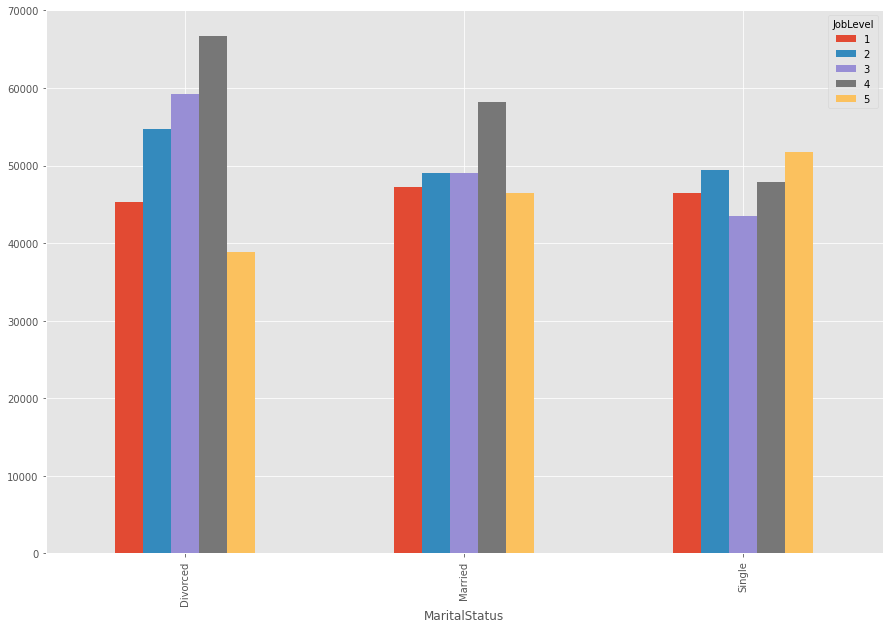

In [ ]:
Level_Analysis.plot(kind='bar', figsize=(15,10)); #, stacked=True

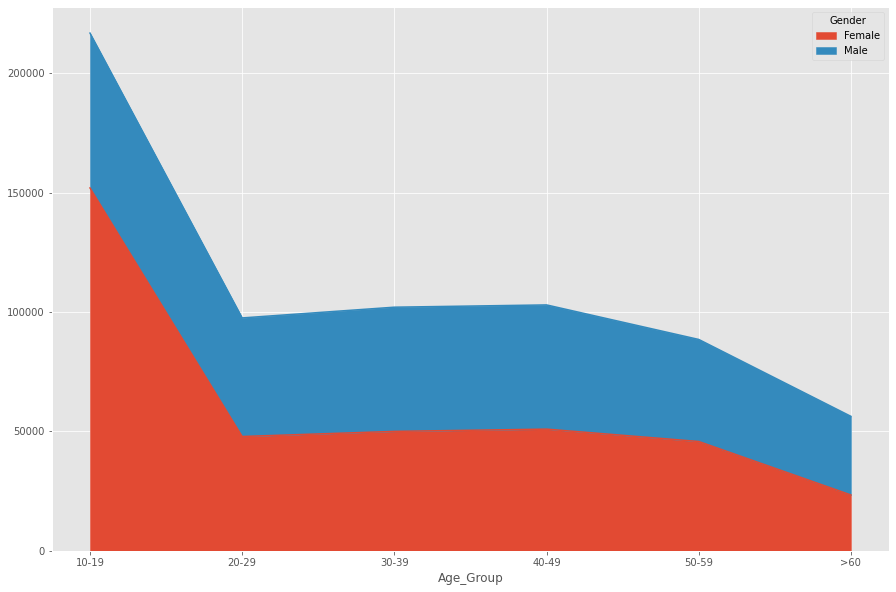

In [ ]:
Gender_Analysis.plot(kind='area',stacked=True, figsize=(15,10));

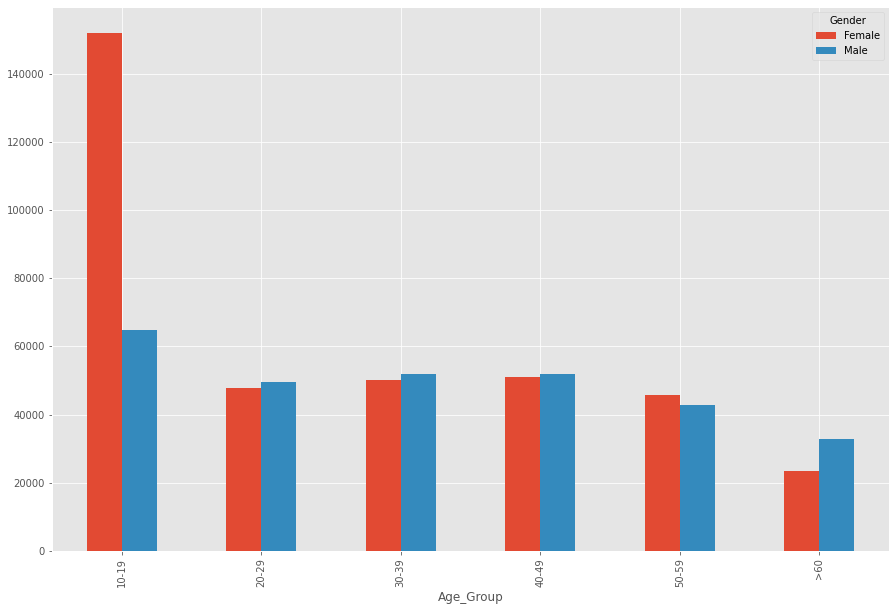

In [ ]:
Gender_Analysis.plot(kind='bar', figsize=(15,10)); #, stacked=True

Now we have some visuals we can easily display to stakeholders to help communicate our message.

In [ ]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeID',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Age_Group']

In [ ]:
import statsmodels as sm

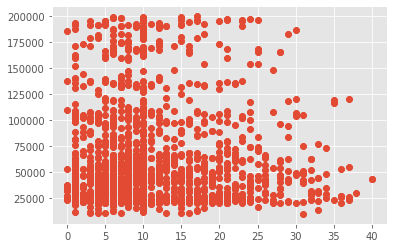

In [ ]:
plt.scatter(df['TotalWorkingYears'],df['MonthlyIncome'])

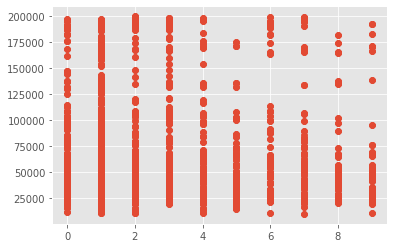

In [ ]:
plt.scatter(df['NumCompaniesWorked'],df['MonthlyIncome'])

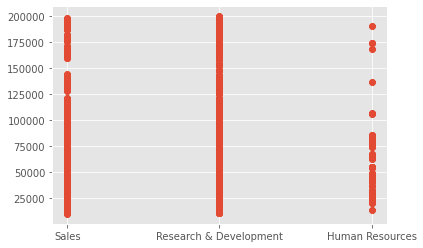

In [ ]:
plt.scatter(df['Department'],df['MonthlyIncome'])

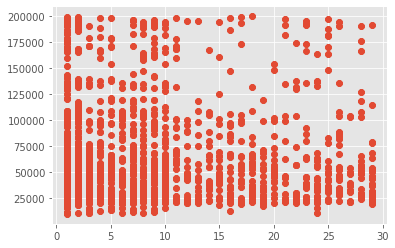

In [ ]:
plt.scatter(df['DistanceFromHome'],df['MonthlyIncome'])

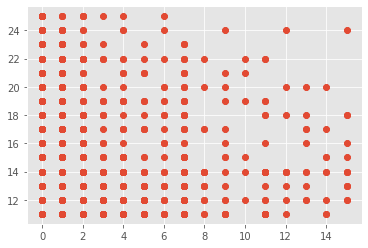

In [ ]:
plt.scatter(df['YearsSinceLastPromotion'],df['PercentSalaryHike'])

In [ ]:
df.groupby('JobLevel')['MonthlyIncome'].max()

JobLevel
1    199260
2    199990
3    199730
4    195370
5    196360
Name: MonthlyIncome, dtype: int64

In [ ]:
from statsmodels.formula.api import ols


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
results=ols('YearsAtCompany ~ MonthlyIncome + JobLevel',data=df).fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.034
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           0.000121
Time:                        20:09:26   Log-Likelihood:                -14210.
No. Observations:                4401   AIC:                         2.843e+04
Df Residuals:                    4398   BIC:                         2.845e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7046      0.229     33.699

In [ ]:
gender_dummies=pd.get_dummies(df['Gender'])

In [ ]:
gender_dummies

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
4404,1,0
4405,1,0
4406,0,1
4407,0,1
